```
MobileMamba_T2 cuda 18887.749031796222 images/s @ batch size 2048
MobileMamba_T4 cuda 14856.973888107455 images/s @ batch size 2048
MobileMamba_S6 cuda 10502.179270141887 images/s @ batch size 2048
MobileMamba_B1 cuda 6029.287781097284 images/s @ batch size 2048
FasterNet_T0 cuda 15489.99234195275 images/s @ batch size 2048
FasterNet_T1 cuda 10590.663906682472 images/s @ batch size 2048
FasterNet_T2 cuda 4787.3218002027525 images/s @ batch size 2048
starnet_s1 cuda 6733.641373249994 images/s @ batch size 1024
starnet_s2 cuda 6892.355939536969 images/s @ batch size 1024
starnet_s3 cuda 4892.563327993621 images/s @ batch size 1024
starnet_s4 cuda 3410.761149308199 images/s @ batch size 1024
FSANet_64_T1 cuda 41113.43762796633 images/s @ batch size 2048
FSANet_64_T2 cuda 35065.72314694044 images/s @ batch size 2048
FSANet_64_T3 cuda 24366.511264322904 images/s @ batch size 2048
FSANet_64_T4 cuda 19842.317554138546 images/s @ batch size 2048
FSANet_64_T5 cuda 13319.34521429782 images/s @ batch size 2048
EfficientViT_M0 cuda 44186.46950169201 images/s @ batch size 2048
EfficientViT_M1 cuda 32149.650810121697 images/s @ batch size 2048
EfficientViT_M2 cuda 27764.452356350084 images/s @ batch size 2048
EfficientViT_M3 cuda 24033.015829316726 images/s @ batch size 2048
EfficientViT_M4 cuda 22768.735702151393 images/s @ batch size 2048
EfficientViT_M5 cuda 15162.890162426416 images/s @ batch size 2048
```

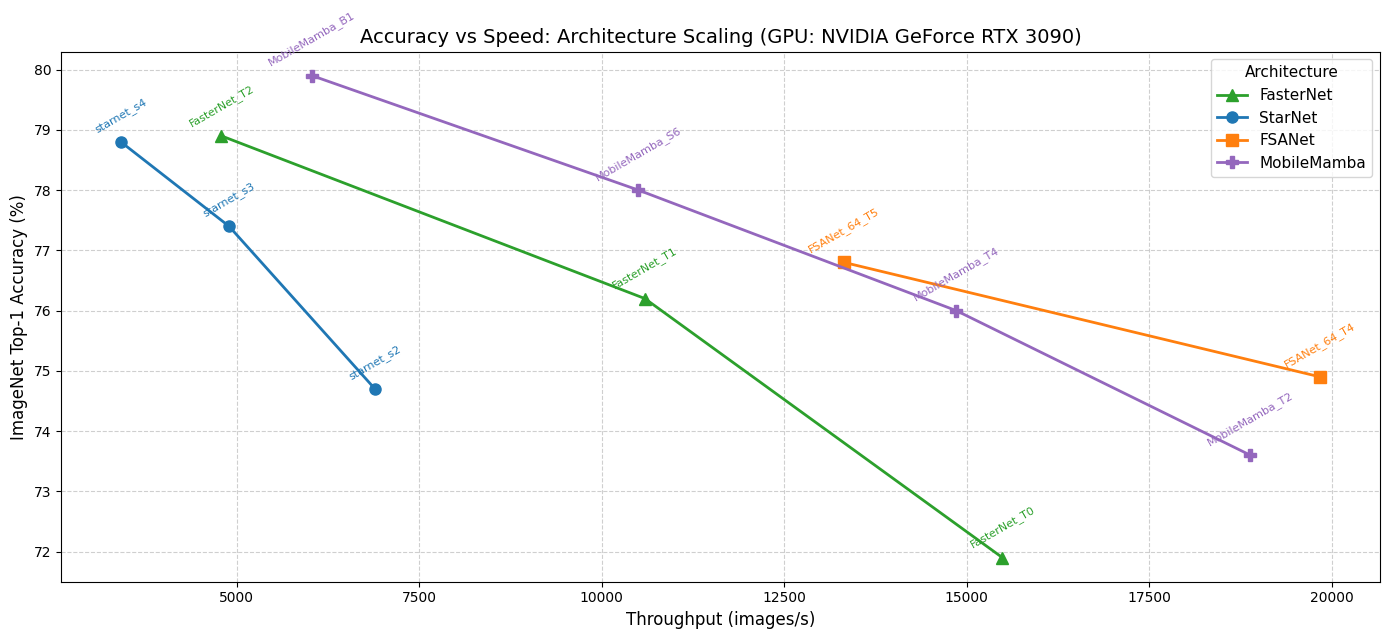

✅ Plot saved as accuracy_vs_speed_lines.png


In [2]:
# plot_speed_accuracy_lines_xy.py
import matplotlib.pyplot as plt
import torch

# ====== 1. 手动填写测速结果（throughput in images/s）======
speed_data = {
    "MobileMamba_T2":18887.749031796222,
    "MobileMamba_T4":14856.973888107455,
    "MobileMamba_S6":10502.179270141887,
    "MobileMamba_B1":6029.287781097284,
    
    "FasterNet_T0": 15489.99234195275,
    "FasterNet_T1": 10590.663906682472,
    "FasterNet_T2": 4787.3218002027525,

    # "LSNet_T": 5734.193151992822,
    # "LSNet_S": 4270.783981703604,
    # "LSNet_B": 2118.068965245158,

    "starnet_s2": 6892.355939536969,
    "starnet_s3": 4892.563327993621,
    "starnet_s4": 3410.761149308199,

    "FSANet_64_T4": 19842.317554138546,
    "FSANet_64_T5": 13319.34521429782,
    # 添加或修改你自己的模型和对应速度
}

# ====== 2. 精度数据（请根据你的实验/论文填写真实值！）======
accuracy_data = {
    "MobileMamba_T2":73.6,
    "MobileMamba_T4":76.0,
    "MobileMamba_S6":78.0,
    "MobileMamba_B1":79.9,


    "FasterNet_T0": 71.9,
    "FasterNet_T1": 76.2,
    "FasterNet_T2": 78.9,

    "starnet_s2": 74.7,
    "starnet_s3": 77.4,
    "starnet_s4": 78.8,



    "FSANet_64_T4": 74.9,
    "FSANet_64_T5": 76.8,  # 这里是重复的模型名，假设是不同的实验结果

    "EfficientViT_M0": 63.2,
    "EfficientViT_M1": 68.4,
    "EfficientViT_M2": 70.8,
    "EfficientViT_M3": 73.4,
    "EfficientViT_M4": 74.3,
    "EfficientViT_M4": 77.1,
}

# 过滤有效模型（同时有速度和精度的）
valid_models = set(speed_data.keys()) & set(accuracy_data.keys())
if not valid_models:
    raise ValueError("No model has both speed and accuracy data!")

# ====== 3. 按架构分组 ======
groups = {
    "FasterNet": [],
    "LSNet": [],
    "StarNet": [],
    "FSANet": [],
    "MobileMamba": [],
}

for model in valid_models:
    if model.startswith("FasterNet"):
        groups["FasterNet"].append(model)
    elif model.startswith("LSNet"):
        groups["LSNet"].append(model)
    elif model.startswith("starnet"):  # 注意：这里用 elif 避免重复归类
        groups["StarNet"].append(model)
    elif model.startswith("FSANet"):
        groups["FSANet"].append(model)
    elif model.startswith("MobileMamba"):
        groups["MobileMamba"].append(model)

# 对每组按速度从高到低排序（这样折线从左到右是速度下降）
for name in groups:
    groups[name].sort(key=lambda m: speed_data[m], reverse=True)

# ====== 4. 绘图 ======
plt.figure(figsize=(14, 6.5))

# 定义每种架构的样式
styles = {
    "StarNet": {"color": "#1f77b4", "marker": "o", "linestyle": "-"},
    "FSANet": {"color": "#ff7f0e", "marker": "s", "linestyle": "-"},
    "FasterNet": {"color": "#2ca02c", "marker": "^", "linestyle": "-"},
    "LSNet": {"color": "#d62728", "marker": "D", "linestyle": "-"},
    "MobileMamba": {"color": "#9467bd", "marker": "P", "linestyle": "-"},
}

for group_name, models in groups.items():
    if not models:
        continue
    speeds = [speed_data[m] for m in models]      # X: 速度
    accs   = [accuracy_data[m] for m in models]   # Y: 精度

    style = styles.get(group_name, {"marker": "x"})
    
    # 绘制折线 + 散点
    plt.plot(speeds, accs,
             marker=style["marker"],
             color=style["color"],
             linestyle=style["linestyle"],
             linewidth=2,
             markersize=8,
             label=group_name)
    
    # 标注每个点的模型名
    for i, model in enumerate(models):
        plt.text(speeds[i], accs[i] + 0.12, model, 
                 fontsize=8, ha='center', va='bottom', 
                 color=style["color"], rotation=30)

# ====== 5. 图表设置 ======
plt.xlabel('Throughput (images/s)', fontsize=12)
plt.ylabel('ImageNet Top-1 Accuracy (%)', fontsize=12)

device_name = torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU"
plt.title(f'Accuracy vs Speed: Architecture Scaling (GPU: {device_name})', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Architecture", fontsize=11, title_fontsize=11)
plt.tight_layout()
plt.savefig('accuracy_vs_speed_lines.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Plot saved as accuracy_vs_speed_lines.png")

```
MobileMamba_T2 cpu 83.55558502233626 images/s @ batch size 16
MobileMamba_T4 cpu 59.08182941076521 images/s @ batch size 16
MobileMamba_S6 cpu 38.963829098536145 images/s @ batch size 16
MobileMamba_B1 cpu 18.89609141909768 images/s @ batch size 16
FasterNet_T0 cpu 130.72792957890007 images/s @ batch size 16
FasterNet_T1 cpu 60.78527324794704 images/s @ batch size 16
FasterNet_T2 cpu 28.447883927616694 images/s @ batch size 16
starnet_s1 cpu 63.47067718097843 images/s @ batch size 16
starnet_s2 cpu 69.26026532027771 images/s @ batch size 16
starnet_s3 cpu 46.282888860478366 images/s @ batch size 16
starnet_s4 cpu 31.981879011280462 images/s @ batch size 16
FSANet_64_T1 cpu 206.8737964862688 images/s @ batch size 16
FSANet_64_T2 cpu 170.32580962085225 images/s @ batch size 16
FSANet_64_T3 cpu 112.36729036787055 images/s @ batch size 16
FSANet_64_T4 cpu 92.0259397280571 images/s @ batch size 16
FSANet_64_T5 cpu 50.97945508755334 images/s @ batch size 16
EfficientViT_M0 cpu 282.01508145406115 images/s @ batch size 16
EfficientViT_M1 cpu 178.51916728549625 images/s @ batch size 16
EfficientViT_M2 cpu 148.66593875761265 images/s @ batch size 16
EfficientViT_M3 cpu 114.86531948099629 images/s @ batch size 16
EfficientViT_M4 cpu 100.5377934157567 images/s @ batch size 16
EfficientViT_M5 cpu 74.89607582030747 images/s @ batch size 16
```

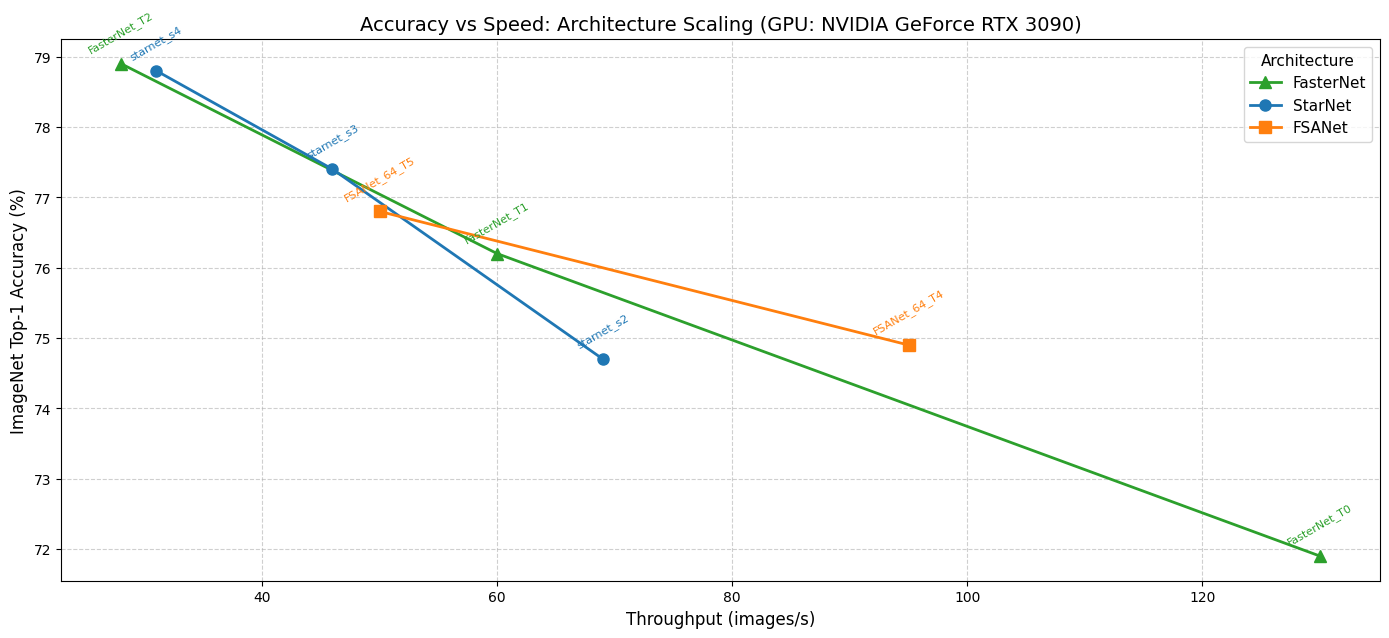

✅ Plot saved as accuracy_vs_speed_lines.png


In [6]:
# plot_speed_accuracy_lines_xy.py
import matplotlib.pyplot as plt
import torch

# ====== 1. 手动填写测速结果（throughput in images/s）======
speed_data = {
    # "MobileMamba_T2":83,
    # "MobileMamba_T4":59,
    # "MobileMamba_S6":38,
    # "MobileMamba_B1":18,
    
    "FasterNet_T0": 130,
    "FasterNet_T1": 60,
    "FasterNet_T2": 28,

    # "LSNet_T": 5734.193151992822,
    # "LSNet_S": 4270.783981703604,
    # "LSNet_B": 2118.068965245158,

    "starnet_s2": 69,
    "starnet_s3": 46,
    "starnet_s4": 31,

    "FSANet_64_T4": 95,
    "FSANet_64_T5": 50,
    # 添加或修改你自己的模型和对应速度
}

# ====== 2. 精度数据（请根据你的实验/论文填写真实值！）======
accuracy_data = {
    "MobileMamba_T2":73.6,
    "MobileMamba_T4":76.0,
    "MobileMamba_S6":78.0,
    "MobileMamba_B1":79.9,


    "FasterNet_T0": 71.9,
    "FasterNet_T1": 76.2,
    "FasterNet_T2": 78.9,

    "starnet_s2": 74.7,
    "starnet_s3": 77.4,
    "starnet_s4": 78.8,



    "FSANet_64_T4": 74.9,
    "FSANet_64_T5": 76.8,  # 这里是重复的模型名，假设是不同的实验结果

    "EfficientViT_M0": 63.2,
    "EfficientViT_M1": 68.4,
    "EfficientViT_M2": 70.8,
    "EfficientViT_M3": 73.4,
    "EfficientViT_M4": 74.3,
    "EfficientViT_M4": 77.1,
}

# 过滤有效模型（同时有速度和精度的）
valid_models = set(speed_data.keys()) & set(accuracy_data.keys())
if not valid_models:
    raise ValueError("No model has both speed and accuracy data!")

# ====== 3. 按架构分组 ======
groups = {
    "FasterNet": [],
    "LSNet": [],
    "StarNet": [],
    "FSANet": [],
    "MobileMamba": [],
}

for model in valid_models:
    if model.startswith("FasterNet"):
        groups["FasterNet"].append(model)
    elif model.startswith("LSNet"):
        groups["LSNet"].append(model)
    elif model.startswith("starnet"):  # 注意：这里用 elif 避免重复归类
        groups["StarNet"].append(model)
    elif model.startswith("FSANet"):
        groups["FSANet"].append(model)
    elif model.startswith("MobileMamba"):
        groups["MobileMamba"].append(model)

# 对每组按速度从高到低排序（这样折线从左到右是速度下降）
for name in groups:
    groups[name].sort(key=lambda m: speed_data[m], reverse=True)

# ====== 4. 绘图 ======
plt.figure(figsize=(14, 6.5))

# 定义每种架构的样式
styles = {
    "StarNet": {"color": "#1f77b4", "marker": "o", "linestyle": "-"},
    "FSANet": {"color": "#ff7f0e", "marker": "s", "linestyle": "-"},
    "FasterNet": {"color": "#2ca02c", "marker": "^", "linestyle": "-"},
    "LSNet": {"color": "#d62728", "marker": "D", "linestyle": "-"},
    "MobileMamba": {"color": "#9467bd", "marker": "P", "linestyle": "-"},
}

for group_name, models in groups.items():
    if not models:
        continue
    speeds = [speed_data[m] for m in models]      # X: 速度
    accs   = [accuracy_data[m] for m in models]   # Y: 精度

    style = styles.get(group_name, {"marker": "x"})
    
    # 绘制折线 + 散点
    plt.plot(speeds, accs,
             marker=style["marker"],
             color=style["color"],
             linestyle=style["linestyle"],
             linewidth=2,
             markersize=8,
             label=group_name)
    
    # 标注每个点的模型名
    for i, model in enumerate(models):
        plt.text(speeds[i], accs[i] + 0.12, model, 
                 fontsize=8, ha='center', va='bottom', 
                 color=style["color"], rotation=30)

# ====== 5. 图表设置 ======
plt.xlabel('Throughput (images/s)', fontsize=12)
plt.ylabel('ImageNet Top-1 Accuracy (%)', fontsize=12)

device_name = torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU"
plt.title(f'Accuracy vs Speed: Architecture Scaling (GPU: {device_name})', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Architecture", fontsize=11, title_fontsize=11)
plt.tight_layout()
plt.savefig('accuracy_vs_speed_cpu.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Plot saved as accuracy_vs_speed_lines.png")